In [39]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


The following dataset is a collection of the offensive statistics for every baseball player who is registed in the Lahmann's Baseball Database , a database which contains all MLB players statistics from 1879 to 2015. I then made two sets, one containing the career statistics of all Hall of Fame inductees and another list containig the statistics for players who were never/ have not been inducted in the MLB Hall of Fame. This notebook contains various prediciton tests that were used to test the efficiency of the model's variables in prediting which players would be admitted or rejected from entrance to the Hall of Fame given their respective statistics

http://www.seanlahman.com/baseball-archive/statistics/

In [40]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Steriod = pd.read_csv('/Users/ezzan/Downloads/python_drills/steriodslist.csv')
FieldingOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/FieldingOF.csv')
Battingpost = pd.read_csv('/Users/ezzan/Downloads/python_drills/BattingPost.csv')
Saber =pd.read_csv('/Users/ezzan/Downloads/FanGraphs Leaderboard (1).csv')

Full record of Hall of Fame inductees and rejectees

In [41]:
HOF.head(5)
HOF= HOF.sort_values('playerID')
HOF.drop(['needed_note'], axis=1, inplace=True)
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
inductees = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
hofn = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]
Batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [90]:

Batting['playerID1'] = Batting.playerID.str[-4:-2] + Batting.playerID.str[0:4]
inductees['playerID1'] = Batting.playerID.str[-4:-2] + Batting.playerID.str[0:4]
inductees.head(10)

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,playerID1
2860,aaronha01,1982,BBWAA,415.0,312.0,406.0,Y,Player,edgast
228,alexape01,1938,BBWAA,262.0,197.0,212.0,Y,Player,urorou
3913,alomaro01,2011,BBWAA,581.0,436.0,523.0,Y,Player,jaglas
458,ansonca01,1939,Old Timers,NaN,NaN,NaN,Y,Player,miledw
2952,aparilu01,1984,BBWAA,403.0,303.0,341.0,Y,Player,demcgu
1969,applilu01,1964,Run Off,201.0,NaN,189.0,Y,Player,nialex
3428,ashburi01,1995,Veterans,NaN,NaN,NaN,Y,Player,bitraf
2582,averiea01,1975,Veterans,NaN,NaN,NaN,Y,Player,frring
4120,bagweje01,2017,BBWAA,442.0,332.0,381.0,Y,Player,biwhit
1483,bakerfr01,1955,Veterans,NaN,NaN,NaN,Y,Player,jodoyl


hofn and hofy are divide those rejected and accepted into two lists

The dataframes below include the sbatting statistics for all players were finally inducted and all players who have not been inducted. The dataframes contains the cumlative career statistics for standard batting statistics such as AB (at-bats), H (hits), HR (home runs), RBI (Runs batted in) and more exotic statistics as well such as OBP (on base percentage) and "slug" (slugging percentage), both statistics which have been used heavily in modern day sabermetrics in evaluating a players offensive prowess.

In [6]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]

##make clearer names for masterid and masterid1
MasterID = pd.merge(Batting, inductees, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
#MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug

#never admitted
#neveramitted players who were not admitted to HOF
MasterID1 = pd.merge(Batting, hofn, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
MasterID1["avg."]=MasterID1.H/MasterID1.AB
MasterID1["1B"]=(MasterID1.H-MasterID1["3B"]-MasterID1["2B"])
MasterID1["OBP"]= (MasterID1.H + MasterID1.BB + MasterID1.HBP ) / (MasterID1.AB + MasterID1.BB + MasterID1.HBP + MasterID1.SF)
MasterID1["slug"]=(MasterID1["1B"] + 2*MasterID1["2B"] + MasterID1["3B"]*3 + 4*MasterID1.HR)/MasterID1.AB
MasterID1["OPS"] = MasterID1.OBP + MasterID1.slug


#in order to make sure includes the players who were eventually inducted we created admitted/neveradmitted to differentiate
# = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
#MasterID1= MasterID1.sort_values('votes', ascending = False)
admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
#neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
neveradmitted = neveradmitted.drop_duplicates()
neveradmitted = neveradmitted.groupby(['playerID']).sum()
neveradmitted['admitted'] = 0

#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
#Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
careerstats = MasterID.groupby(['playerID']).sum()
seasonsplayed = MasterID.playerID.value_counts()
careerstats["Career Avg."] = careerstats['H']/careerstats['AB']
careerstats.drop(['yearID', 'yearid', 'ballots', 'needed', 'votes', 'avg.', 'OBP', 'slug', 'OPS'], axis=1, inplace=True)
careerstats["OBP"]= (careerstats.H + careerstats.BB + careerstats.HBP ) / (careerstats.AB + careerstats.BB + careerstats.HBP + careerstats.SF)
careerstats["slug"]=( careerstats["1B"] + 2* careerstats["2B"] +  careerstats["3B"]*3 + 4* careerstats.HR)/ careerstats.AB
careerstats["OPS"] =  careerstats.OBP +  careerstats.slug
careerstats['admitted'] = 1


In [19]:
careerstats1 = Fielding.groupby(['playerID']).sum()
careerstats1.head()

,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
playerID,,,,,,,,,,,,,,
aardsda01,18084,9,331,0.0,1011.0,11,29.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
aaronha01,70739,36,3020,2977.0,78413.0,7436,429.0,144.0,218.0,0.0,0.0,0.0,0.0,0.0
aaronto01,35389,18,387,206.0,6472.0,1317,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0
aasedo01,25786,13,448,91.0,3328.0,67,135.0,13.0,10.0,0.0,0.0,0.0,0.0,0.0
abadan01,6007,3,9,4.0,138.0,37,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0


In [83]:
careerstats.head(5)

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,1B,Career Avg.,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,121.0,3049,0.304998,0.373949,0.615577,0.989527,1
alexape01,22,703,1810,154,378,60,13,11,163.0,3.0,77,276.0,2.0,0.0,305,0.208840,0.241927,0.280663,0.522590,1
alomaro01,21,2379,9073,1508,2724,504,80,210,1134.0,474.0,1032,1140.0,50.0,97.0,2140,0.300231,0.371245,0.465998,0.837243,1
ansonca01,27,2523,10277,1996,3418,581,142,97,2076.0,276.0,983,302.0,32.0,0.0,2695,0.332587,0.392579,0.454510,0.847089,1
aparilu01,18,2601,10230,1335,2677,394,92,83,791.0,506.0,736,742.0,27.0,76.0,2191,0.261681,0.310778,0.350635,0.661413,1


In [84]:
neveradmitted.head(5)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,yearid,ballots,needed,votes,avg.,1B,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,,
aguilri01,37863.0,22.0,737.0,139.0,12.0,28.0,3.0,0.0,3.0,11.0,...,38114.0,9880.0,7410.0,57.0,0.909641,25.0,1.119903,1.247059,2.366962,0
alomaro01,37939.0,21.0,2379.0,9073.0,1508.0,2724.0,504.0,80.0,210.0,1134.0,...,38190.0,10241.0,7695.0,7543.0,5.567778,2140.0,6.866019,8.607207,15.473225,0
alomasa02,43958.0,24.0,1377.0,4530.0,520.0,1236.0,249.0,10.0,112.0,588.0,...,44286.0,12518.0,9394.0,352.0,5.501731,977.0,6.254701,8.610274,14.864975,0
aloumo01,35981.0,19.0,1942.0,7037.0,1109.0,2134.0,421.0,39.0,332.0,1287.0,...,36252.0,10278.0,7722.0,108.0,5.308886,1674.0,6.319007,9.376323,15.695331,0
anderbr01,31913.0,17.0,1834.0,6499.0,1062.0,1661.0,338.0,67.0,210.0,761.0,...,32128.0,8688.0,6528.0,0.0,3.878434,1256.0,5.562575,6.650673,12.213247,0


Finally we made a master list contain the cumlative career statistics for all players, both inducted and rejected lableled "result"

In [21]:
frames = [careerstats,neveradmitted]
result = pd.concat(frames)
result = result.sort_index()
result = result.dropna(axis = 1)
#result = result.dropna(axis = 0)
result["Career Avg."] = result['H']/result["AB"]
result.head(10)

,1B,2B,3B,AB,BB,CS,G,GIDP,H,HBP,...,R,RBI,SB,SF,SH,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,3049.0,624.0,98.0,12364.0,1402.0,73.0,3298.0,328.0,3771.0,32.0,...,2174.0,2297.0,240.0,121.0,21.0,1383.0,1,0.615577,23.0,0.304998
aguilri01,25.0,3.0,0.0,139.0,6.0,0.0,737.0,1.0,28.0,0.0,...,12.0,11.0,0.0,0.0,16.0,37.0,0,1.247059,22.0,0.201439
alexape01,305.0,60.0,13.0,1810.0,77.0,5.0,703.0,0.0,378.0,2.0,...,154.0,163.0,3.0,0.0,88.0,276.0,1,0.280663,22.0,0.208840
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,114.0,2379.0,206.0,2724.0,50.0,...,1508.0,1134.0,474.0,97.0,148.0,1140.0,1,0.465998,21.0,0.300231
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,114.0,2379.0,206.0,2724.0,50.0,...,1508.0,1134.0,474.0,97.0,148.0,1140.0,0,8.607207,21.0,0.300231
alomasa02,977.0,249.0,10.0,4530.0,212.0,24.0,1377.0,132.0,1236.0,41.0,...,520.0,588.0,25.0,34.0,48.0,499.0,0,8.610274,24.0,0.272848
aloumo01,1674.0,421.0,39.0,7037.0,737.0,37.0,1942.0,195.0,2134.0,48.0,...,1109.0,1287.0,106.0,82.0,9.0,894.0,0,9.376323,19.0,0.303254
anderbr01,1256.0,338.0,67.0,6499.0,960.0,100.0,1834.0,65.0,1661.0,154.0,...,1062.0,761.0,315.0,50.0,74.0,1190.0,0,6.650673,17.0,0.255578
anderga01,1971.0,522.0,36.0,8640.0,429.0,47.0,2228.0,197.0,2529.0,8.0,...,1084.0,1365.0,80.0,87.0,13.0,1224.0,0,8.131875,17.0,0.292708


In [ ]:
frames = [careerstats,neveradmitted]
result = pd.concat(frames)
result = result.sort_index()
result = result.dropna(axis = 1)
#result = result.dropna(axis = 0)
result["Career Avg."] = result['H']/result["AB"]
result.head(10)

In [29]:
result[result["admitted"]==1]
result.columns

Index(['1B', '2B', '3B', 'AB', 'BB', 'CS', 'G', 'GIDP', 'H', 'HBP', 'HR',
       'IBB', 'OBP', 'OPS', 'R', 'RBI', 'SB', 'SF', 'SH', 'SO', 'admitted',
       'slug', 'stint', 'Career Avg.'],
      dtype='object')

# Visiual Distribution of Key Statistics

Text(0.5,0,'Career Hrs Hit by Hall of Famers')

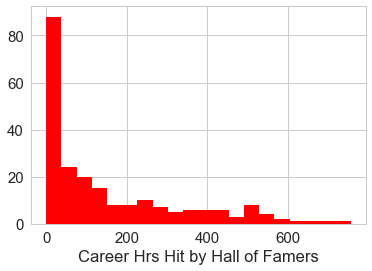

In [87]:
import matplotlib.pyplot as plt
plt.hist(careerstats['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Career Hrs Hit by Hall of Famers')


Text(0.5,0,'Career RBI by Hall of Famers')

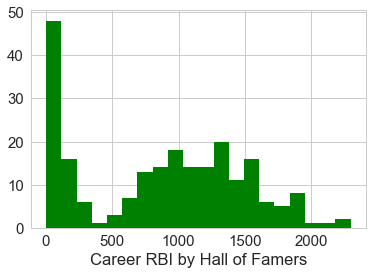

In [88]:
plt.hist(careerstats['RBI'].dropna(),bins=20, color = 'green')
plt.xlabel('Career RBI by Hall of Famers')

Text(0.5,0,'Career Hits by Hall of Famers')

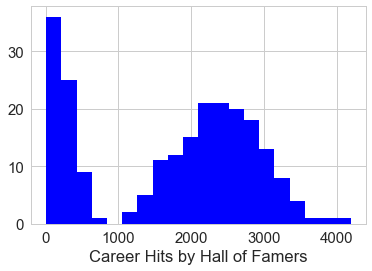

In [89]:
plt.hist(careerstats['H'].dropna(),bins = 20, color = 'blue')
plt.xlabel('Career Hits by Hall of Famers')

Text(0.5,0,'OBP by Hall of Famers')

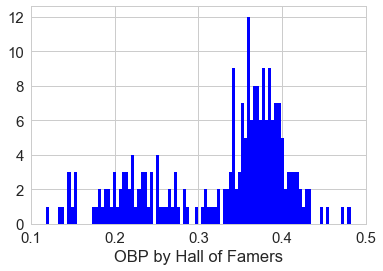

In [90]:
plt.hist(careerstats['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers')

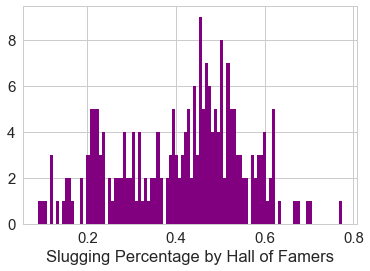

In [91]:
plt.hist(careerstats['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers')

Text(0.5,0,'OPS by Hall of Famers per 100 games or more')

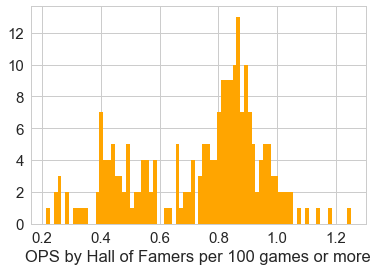

In [92]:
plt.hist(careerstats['OPS'].dropna(),bins=80, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

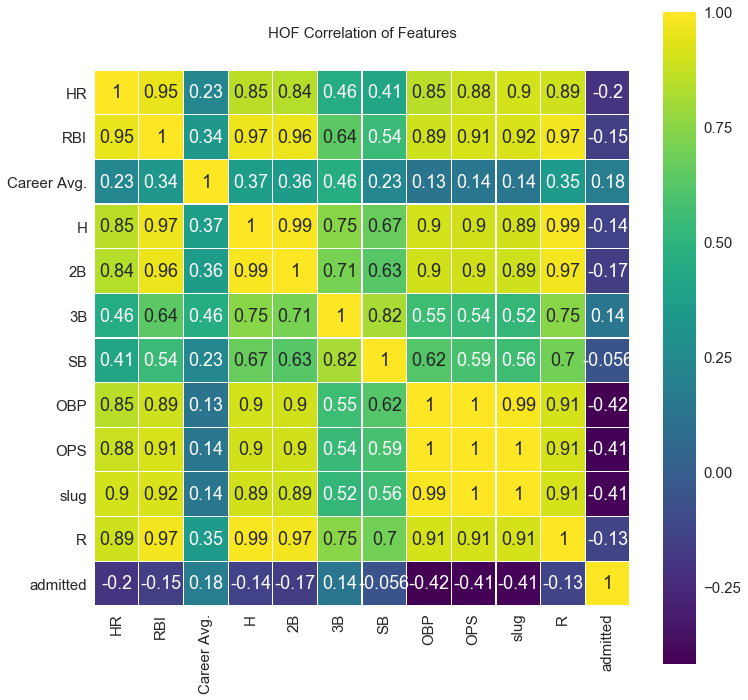

In [103]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('HOF Correlation of Features', y=1.05, size=15)
careerstats1 = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R","admitted"]]
sns.heatmap(careerstats1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# KNN Predictor

### The first prediction model is KNN model.
I thought this model would be good representation..
I then used weighted and unweighted..
I then adjusted number of K inorder to evaluate

In [93]:
result.columns

Index(['1B', '2B', '3B', 'AB', 'BB', 'G', 'H', 'HBP', 'HR', 'OBP', 'OPS', 'R',
       'RBI', 'SB', 'SF', 'SO', 'admitted', 'slug', 'stint', 'Career Avg.'],
      dtype='object')

In [94]:
result[result['admitted'] == 0][["HR", "RBI", "Career Avg.", "H", "2B", "3B", "SB"]]
result.dropna()
result = result.drop(["baineha01"])
result = result.drop(["belleal01"])
result = result.drop(["drewj.01"])
result.head(5)

,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,3049.0,624.0,98.0,12364.0,1402.0,3298.0,3771.0,32.0,755.0,0.373949,0.989527,2174.0,2297.0,240.0,121.0,1383.0,1,0.615577,23.0,0.304998
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alexape01,305.0,60.0,13.0,1810.0,77.0,703.0,378.0,2.0,11.0,0.241927,0.522590,154.0,163.0,3.0,0.0,276.0,1,0.280663,22.0,0.208840
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,2379.0,2724.0,50.0,210.0,0.371245,0.837243,1508.0,1134.0,474.0,97.0,1140.0,1,0.465998,21.0,0.300231
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,2379.0,2724.0,50.0,210.0,6.866019,15.473225,1508.0,1134.0,474.0,97.0,1140.0,0,8.607207,21.0,0.300231


In [96]:
from sklearn.neighbors import KNeighborsClassifier
KNNall = KNeighborsClassifier(n_neighbors=5)
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Prediciton Trials

In [97]:
print(KNNall.predict([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))
print(KNNall.predict_proba([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))

[1]
[[0.2 0.8]]


In [98]:
print(KNNall.predict([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))
print(KNNall.predict_proba([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))

[0]
[[0.6 0.4]]


# KNN Predictors (both weightted and unweighted predictors included)

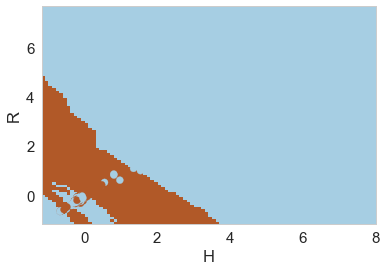

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=20)


# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'H.': stats.zscore(result.H),
    'R': stats.zscore(result.R)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('H')
plt.ylabel('R')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

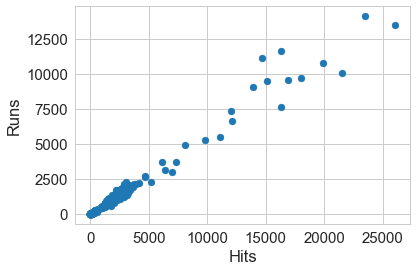

In [110]:
plt.scatter(result.H, result.R)
plt.xlabel("Hits")
plt.ylabel("Runs")
plt.show()

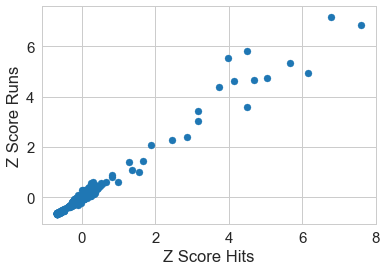

In [115]:
# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'H': stats.zscore(result.H),
    'R': stats.zscore(result.R)
})
plt.xlabel("Z Score Hits")
plt.ylabel("Z Score Runs")

plt.scatter(X.H, X.R)


# Different K Variables

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
KNNall5 = KNeighborsClassifier(n_neighbors=10)
KNNall5w = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
KNNall5.fit(X,Y)
KNNall5w.fit(X,Y)
score = cross_val_score(KNNall5, X, Y, cv=5)

print("k = 5, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#rerun KNNall unweighted as well
score1 = cross_val_score(KNNall5w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))


k = 5, with all stats inputs
Unweighted Accuracy: 0.80 (+/- 0.12)
weighted Accuracy: 0.81 (+/- 0.12)


In [53]:

from sklearn.neighbors import KNeighborsClassifier

KNNall17 = KNeighborsClassifier(n_neighbors=17)
KNNall17w= KNeighborsClassifier(n_neighbors =17, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall17.fit(X,Y)
KNNall17w.fit(X,Y)
score2 = cross_val_score(KNNall17, X, Y, cv=5)
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("k = 17, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
#rerun KNNall unweighted as well
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))


k = 17, with all stats inputs
Unweighted Accuracy: 0.77 (+/- 0.13)
weighted Accuracy: 0.79 (+/- 0.14)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNNall20 = KNeighborsClassifier(n_neighbors=20)
KNNall20w = KNeighborsClassifier(n_neighbors=20, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall20.fit(X,Y)
KNNall20w.fit(X,Y)

score = cross_val_score(KNNall20, X, Y, cv=5)
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("k = 20, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with all stats inputs
Unweighted Accuracy: 0.77 (+/- 0.13)
Weighted Accuracy: 0.78 (+/- 0.13)


In [132]:
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn10w = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
knn10.fit(X,Y)
knn10w.fit(X,Y)
score = cross_val_score(knn10, X, Y, cv=5)
print("k = 10, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn10w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 10, with all stats inputs
Unweighted Accuracy: 0.79 (+/- 0.14)
Weighted Accuracy: 0.81 (+/- 0.14)


In [174]:
knn7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn7w = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
knn7.fit(X,Y)
knn7w.fit(X,Y)
score = cross_val_score(knn7, X, Y, cv=5)
score = cross_val_score(knn7w, X, Y, cv=5)
print("k = 7, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn7w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 7, with all stats inputs
Unweighted Accuracy: 0.83 (+/- 0.11)
Weighted Accuracy: 0.83 (+/- 0.11)


Based on the experimentation from the various K numbers, a K value of 7 produces the most accurate predicitons. This can be attributed to the fact that 7 is big enough of a number to avoid overfitting but still remain localized to the prediciton in question.

## Cross Testing on KNN Model

### Accuracy Score of Predicition Model : 73.00%
Model below displays corrected predicitons for both players who were rejected and accepted to Hall of Fame. Our predicitons were correct 100% of the time indicating that our prediciton model was perfect.

In [171]:
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNNall.fit(X_train,Y_train)
Y_pred = KNNall.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7333333333333333

## Accuracy Score of Confusion Matrix = 73.3% accuracy
The accuracy score mentioned above provides better result than confusion matrix but worse than cross validation method written below. This could be attributed to the more balanced exposure to the rest of the entirety of the set enabling to  provide a more balanced prediciton.

In [175]:
confusion_matrix(Y_test, Y_pred)

array([[34, 16],
       [12, 43]], dtype=int64)

In [178]:
((34+43)/(34+12+16+43))

0.7333333333333333

### Average Accuracy Score of Cross Validation Mode (KNN)l: 78-79%

In [181]:
cross_val_score(KNNall, X_train, Y_train, cv=5)

array([0.77777778, 0.77777778, 0.80952381, 0.77419355, 0.85245902])

# SVM/PCA Testing

Another predition model used to test the effectiveness of the information in testing the data is SVM and PCA test.

In [62]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
SVM = SVC(kernel = 'linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
accuracy_score(Y_test, Y_pred)


0.6952380952380952

In [63]:
SVM.score(X_train, Y_train)

0.782051282051282

In [64]:
SVM.score(X_test, Y_test)

0.6952380952380952

Accuracy score shows a very good ability to classify on train set and a weaker accuracy rate on the test set. We now run a 5-fold CV on the dataset.

In [65]:
cross_val_score(SVM, X, Y, cv=5)

array([0.80952381, 0.76190476, 0.77380952, 0.6746988 , 0.74390244])

5-fold CV gives a stable SVM cross_val_score around 75% accuracy prediction.

In [164]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=7)
newX = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.05765340e-01 1.42023685e-01 1.12250546e-01 2.29998909e-02
 1.53490893e-02 1.20296547e-03 4.08482628e-04]
[45.38864427 20.36092182 18.10136305  8.19369767  6.69357838  1.873888
  1.09195274]


In [165]:
cross_val_score(SVM, newX, Y, cv=5)

array([0.80952381, 0.75      , 0.76190476, 0.69879518, 0.7804878 ])

By integrating PCA into SVM test, we are use the variables which will have the most presence thus providing a better predictor for our data, slightly increasing the average from the SVM.

### Perhaps by implementing a PCA, the dataset will only use the most essential variables in order to predict, thus producing more efficient results.

# Logistic Regression

In [162]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/4)

Coefficients
[[ -5.93256147  11.31877927   0.42751436   5.89824459 -16.48397918
    3.91873737  -1.59332312]]
[0.26701379]

 Accuracy by admission status
admitted    0    1
row_0             
0         165   48
1          28  176
0.8397435897435898

 Accuracy scores:
[0.7721519  0.88461538 0.85897436 0.76623377]

 Average score:
0.8204938521394218


### Below contians the data sets for Pitchers who were both inducted and rejected from HOF. All the tests above can be run on Pitchers as well in order to determine whether they were HOF bound or not.

In [ ]:
#admitted2 contains al the stats for HOF pitchers

master2= pd.merge(Pitching, HOF, left_index=True, right_index=True, on='playerID', how='inner');
master2 = master2.loc[lambda master2: master2['category'] == 'Player', :]
master2 = pd.merge(Pitching, HOF, on='playerID')
master2= master2.sort_values('playerID')
master2.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master2.loc[master2.playerID.isin(inductees)]
admitted3 = master2.loc[~master2.playerID.isin(inductees)]
#admitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
admitted2 = admitted2.drop_duplicates()
admitted2 = admitted2.groupby(['playerID']).sum()


In [ ]:
#neveradmitted2 contains all stats for not inducted pitchers

master3= pd.merge(Pitching, HOF2, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF2, on='playerID')
master3= master3.sort_values('playerID')
#master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master3.loc[master3.playerID.isin(inductees)]
neveradmitted2 = master3.loc[~master3.playerID.isin(inductees)]
#neveradmitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
neveradmitted2 = neveradmitted2.drop_duplicates()
neveradmitted2 = neveradmitted2.groupby(['playerID']).sum()


# Decision Tree/ Random Forest Predictor

In [148]:
from sklearn import tree
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [149]:
cvscore = cross_val_score(clf1, X, Y, cv=5)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[0.8452381  0.75       0.79761905 0.73493976 0.76829268]
-------------------------------------------------------------
mean cv score = 0.779 +- 0.039


In [150]:
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
cvscore2 = cross_val_score(clf2, X, Y, cv=5)
print(cvscore2)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2.mean(), cvscore2.std()))

[0.8452381  0.73809524 0.80952381 0.8313253  0.84146341]
-------------------------------------------------------------
mean cv score = 0.813 +- 0.040


In [151]:
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=5)
cvscore3 = cross_val_score(clf3, X, Y, cv=5)
print(cvscore3)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3.mean(), cvscore3.std()))

[0.8452381  0.77380952 0.80952381 0.75903614 0.87804878]
-------------------------------------------------------------
mean cv score = 0.813 +- 0.044


In [152]:
clf5 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
cvscore5 = cross_val_score(clf5, X, Y, cv=5)
print(cvscore5)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5.mean(), cvscore5.std()))

[0.76190476 0.78571429 0.6547619  0.69879518 0.73170732]
-------------------------------------------------------------
mean cv score = 0.727 +- 0.046


In [153]:
clf6 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)
cvscore6 = cross_val_score(clf6, X, Y, cv=5)
print(cvscore6)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6.mean(), cvscore6.std()))

[0.85714286 0.79761905 0.77380952 0.69879518 0.87804878]
-------------------------------------------------------------
mean cv score = 0.801 +- 0.064


### Decision Trees performed moderately on this data. If I had to choose the best decision trees to implement I would choose clf3 (max depth of 5) and clf6 (max depth of 5 with entropy)

## Random Forest 

In [154]:
from sklearn import ensemble
rfc1 = ensemble.RandomForestClassifier(max_depth=3)
cvscore7 = cross_val_score(rfc1, X, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.82142857 0.79761905 0.80952381 0.81927711 0.87804878]
-------------------------------------------------------------
mean cv score = 0.825 +- 0.028


In [161]:
from sklearn import ensemble
rfc3 = ensemble.RandomForestClassifier(max_depth=7)
cvscore9 = cross_val_score(rfc3, X, Y, cv=5)

print(cvscore9)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore9.mean(), cvscore9.std()))

[0.8452381  0.77380952 0.83333333 0.84337349 0.91463415]
-------------------------------------------------------------
mean cv score = 0.842 +- 0.045


In [155]:
rfc2= ensemble.RandomForestClassifier(max_depth = 5)
cvscore8 = cross_val_score(rfc2, X, Y, cv=5)

print(cvscore8)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore8.mean(), cvscore8.std()))

[0.8452381  0.78571429 0.79761905 0.87951807 0.91463415]
-------------------------------------------------------------
mean cv score = 0.845 +- 0.049


Given that the Decision Trees fared pretty well Random Forests seemed to have represent that success as well.
However, considering that all the variables are highly correlated with one another, therefore it provides us with a very unbalanced data set and leaves very little room for variety and a lot for overfitting.

In [156]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

import pydotplus


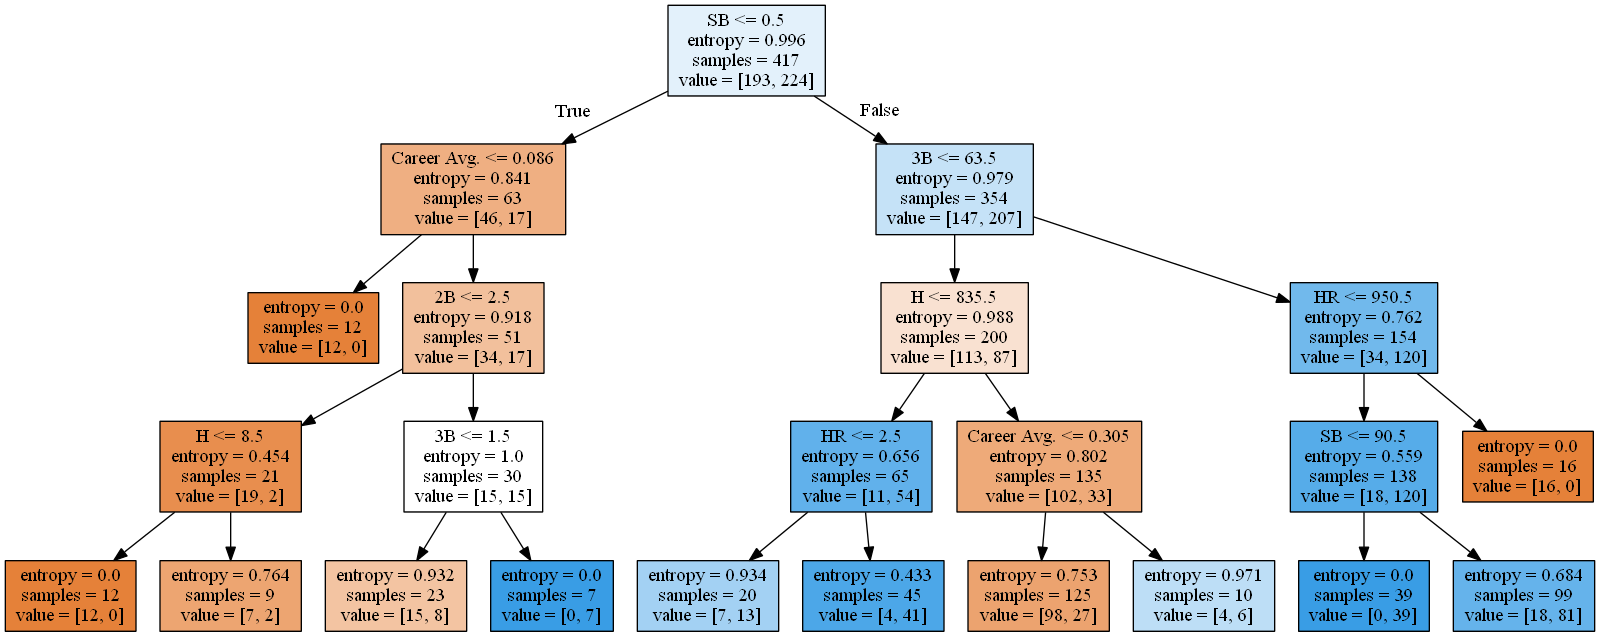

In [158]:


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In general I find KNN the most pleasant to use on binary sets such as whether the player was admitted or not. Given that the data set is moderately sized, it was essential to use  a number that would not overfit but it would not need to be so big in order to provide  a balanced result.

In [59]:
Saber =pd.read_csv('/Users/ezzan/Downloads/FanGraphs Leaderboard (1).csv')

In [61]:
import re

# We expect the first name to follow the first capital letter.
firstname = Saber.Name.apply(lambda x: re.findall('[A-Z][a-z]*', x)[0])

# We expect the last name to follow the second capital letter.
lastname = Saber.Name.apply(lambda x: re.findall('[A-Z][a-z]*', x)[1])

print(firstname, '\n')
print(lastname)

0         Barry
1         Barry
2         Barry
3         Barry
4         Frank
5          Mark
6          Mark
7         Larry
8          Jeff
9         Larry
10       George
11        Manny
12       Albert
13         Todd
14       Carlos
15        Jason
16        Edgar
17        Barry
18         Mike
19        Jason
20        Sammy
21        Bryce
22       Albert
23        Larry
24          Jim
25        Manny
26        Manny
27       Albert
28        Barry
29        Larry
         ...   
5564      Cesar
5565        Ted
5566     Curtis
5567      Garry
5568       Jose
5569      Scott
5570      Angel
5571      Terry
5572        Rey
5573      Clint
5574      Glenn
5575      Ozzie
5576     Adeiny
5577      Chris
5578       Zack
5579        Rey
5580      Garry
5581     Darwin
5582     Adeiny
5583      Cesar
5584      Neifi
5585    Alcides
5586       Ivan
5587    Alfredo
5588     Andres
5589       Jose
5590      Billy
5591      Chris
5592       Matt
5593       Doug
Name: Name, Length: 5594

In [77]:
Saber['playerID1'] = Saber.Name.str[0:2] + lastname.str[0:4]
Saber['playerID1'] = Saber.Name1.str.lower()

Saber

,Season,Name,Team,PA,BB%,K%,BB/K,AVG,OBP,SLG,...,wGDP,wSB,wRC,wRAA,wOBA,wRC+,playerid,Name1,playerID,playerID1
0,2002,Barry Bonds,Giants,612,32.4 %,7.7 %,4.21,0.370,0.582,0.799,...,2.3,0.9,184,110.0,0.544,244,1109,babond,babond,babond
1,2004,Barry Bonds,Giants,617,37.6 %,6.6 %,5.66,0.362,0.609,0.812,...,2.0,0.6,184,108.0,0.537,233,1109,babond,babond,babond
2,2001,Barry Bonds,Giants,664,26.7 %,14.0 %,1.90,0.328,0.515,0.863,...,NaN,1.3,200,117.7,0.537,235,1109,babond,babond,babond
3,2003,Barry Bonds,Giants,550,26.9 %,10.5 %,2.55,0.341,0.529,0.749,...,1.4,1.3,148,80.5,0.503,212,1109,babond,babond,babond
4,1994,Frank Thomas,White Sox,517,21.1 %,11.8 %,1.79,0.353,0.487,0.729,...,NaN,-0.9,138,72.4,0.499,205,255,frthom,frthom,frthom
5,1998,Mark McGwire,Cardinals,681,23.8 %,22.8 %,1.05,0.299,0.470,0.752,...,NaN,0.2,176,91.7,0.492,205,1008559,mamc,mamc,mamc
6,1996,Mark McGwire,Athletics,548,21.2 %,20.4 %,1.04,0.312,0.467,0.730,...,NaN,-0.2,142,71.8,0.489,190,1008559,mamc,mamc,mamc
7,1997,Larry Walker,Rockies,664,11.7 %,13.6 %,0.87,0.366,0.452,0.720,...,NaN,3.2,168,86.1,0.488,177,455,lawalk,lawalk,lawalk
8,1994,Jeff Bagwell,Astros,479,13.6 %,13.6 %,1.00,0.368,0.451,0.750,...,NaN,1.3,123,62.6,0.488,205,547,jebagw,jebagw,jebagw
9,1999,Larry Walker,Rockies,513,11.1 %,10.1 %,1.10,0.379,0.458,0.710,...,NaN,0.4,131,64.0,0.485,167,455,lawalk,lawalk,lawalk


In [91]:
SaberID = pd.merge(Saber, inductees, on='playerID1')
SaberID

,Season,Name,Team,PA,BB%,K%,BB/K,AVG,OBP,SLG,...,playerID_x,playerID1,playerID_y,yearid,votedBy,ballots,needed,votes,inducted,category
0,1999,Chipper Jones,Braves,701,18.0 %,13.4 %,1.34,0.319,0.441,0.633,...,chjone,chjone,mcphebi01,2000,Veterans,NaN,NaN,NaN,Y,Player
1,1999,Chipper Jones,Braves,701,18.0 %,13.4 %,1.34,0.319,0.441,0.633,...,chjone,chjone,steartu99,2000,Veterans,NaN,NaN,NaN,Y,Player
2,2008,Chipper Jones,Braves,534,16.9 %,11.4 %,1.48,0.364,0.470,0.574,...,chjone,chjone,mcphebi01,2000,Veterans,NaN,NaN,NaN,Y,Player
3,2008,Chipper Jones,Braves,534,16.9 %,11.4 %,1.48,0.364,0.470,0.574,...,chjone,chjone,steartu99,2000,Veterans,NaN,NaN,NaN,Y,Player
4,2007,Chipper Jones,Braves,600,13.7 %,12.5 %,1.09,0.337,0.425,0.604,...,chjone,chjone,mcphebi01,2000,Veterans,NaN,NaN,NaN,Y,Player
5,2007,Chipper Jones,Braves,600,13.7 %,12.5 %,1.09,0.337,0.425,0.604,...,chjone,chjone,steartu99,2000,Veterans,NaN,NaN,NaN,Y,Player
6,2001,Chipper Jones,Braves,677,14.5 %,12.1 %,1.20,0.330,0.427,0.605,...,chjone,chjone,mcphebi01,2000,Veterans,NaN,NaN,NaN,Y,Player
7,2001,Chipper Jones,Braves,677,14.5 %,12.1 %,1.20,0.330,0.427,0.605,...,chjone,chjone,steartu99,2000,Veterans,NaN,NaN,NaN,Y,Player
8,2002,Chipper Jones,Braves,662,16.2 %,13.4 %,1.20,0.327,0.435,0.536,...,chjone,chjone,mcphebi01,2000,Veterans,NaN,NaN,NaN,Y,Player
9,2002,Chipper Jones,Braves,662,16.2 %,13.4 %,1.20,0.327,0.435,0.536,...,chjone,chjone,steartu99,2000,Veterans,NaN,NaN,NaN,Y,Player
